<a href="https://colab.research.google.com/github/envgp/taking_the_pulse_of_the_planet/blob/main/notebooks/pulse_toolbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Welcome to the Pulse Toolbox! Here you will find code snippets that will be useful in your assignments. These snippets are shown with examples from some sample datasets, but you can extrapolate these tools to any dataset with a matching format. To quickly navigate to a tool you need, use the navigation button on the lefthand side of the screen (three dots next to three bars; look for the gold infinity symbol at the top left corner of this webpage and then look down a bit), and then click the appropriate header.

While we will require you to do some simple changes to these codes for your assignment, like changing a filepath, a column name, or a plot title, nothing in this course will require extensive custom coding. Your focus for each assignment should be choosing the tools that will help you understand your data and solve the open-ended problems posed to you. A question may have many valid answers, as long as you explain your reasoning and show your data analysis.

Please note that these code snippets are not independent; they may rely on previous code snippets to run properly. If you are getting an error when running a single code snippet, try going to the Runtime button near the top of the webpage and hitting "Run All" to ensure that any requesite cells are run as well.

# Make a copy of this notebook for your own use! At the top left corner of this tab, hit "File" -> "Save a Copy in Drive." You will need to save new copies as this notebook is updated throughout the course.

# Package installation, data downloading, and data loading tools



## Installing and loading Python packages
We need to bring some additional packages into Python. If these packages are not already loaded into your notebook by the instructor, paste these code blocks in to load these libraries. These libraries will help us with manipulating and plotting our data.

In [2]:
!pip install xarray numpy pandas geopandas cartopy==0.19.0.post1 ipywidgets rioxarray

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 11.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.3/53.3 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 80.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.5 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp38-cp38-linux_x86_64.whl size=13043526 sha256=0dcd8c570f00f92f50a7

In [3]:
!pip uninstall -y shapely

Found existing installation: shapely 2.0.0
Uninstalling shapely-2.0.0:
  Successfully uninstalled shapely-2.0.0


In [4]:
!pip install shapely --no-binary shapely

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.5/274.5 KB 7.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
Discarding https://files.pythonhosted.org/packages/61/76/6e635cc4ba33e8c170ef5934dad5c269dc5cb9607e878efb2aba12f78361/shapely-2.0.0.tar.gz#sha256=11f1b1231a6c04213fb1226c6968d1b1b3b369ec42d1e9655066af87631860ea (from https://pypi.org/simple/shapely/) (requires-python:>=3.7): Requested unknown from https://files.pythonhosted.org/packages/61/76/6e635cc4ba33e8c170ef5934dad5c269dc5cb9607e878efb2aba12f78361/shapely-2.0.0.tar.gz#sha256=11f1b1231a6c04213fb1226c6968d1b1b3b369ec42d1e9655066af87631860ea has inconsistent name: filename has 'shapely', but metadata has 'unknown'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 KB 17.7 MB/s 

In [5]:
import numpy as np
import xarray as xr
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
import cartopy.crs as ccrs
import cartopy.feature as cf
import datetime
from ipywidgets import widgets, interact
from shapely.geometry import mapping
matplotlib.rcParams['font.size'] = 14

## Downloading course data
In a real life scenario, you would need to find the data you want to analyze, and then go through the process of downloading it. However, in this course, we want the focus to be on you making choices regarding how you analyze your data, rather than data wrangling. Therefore, we provide all the data you need in a GitHub repository. Download the data with these commands at the start of every assignment.

In [6]:
!git clone https://premonition.stanford.edu/sgkang09/taking_the_pulse_data.git

Cloning into 'taking_the_pulse_data'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
tcmalloc: large alloc 2010931200 bytes == 0x56113ca74000 @  0x7eff8cee8680 0x7eff8cf09824 0x56113bbf674a 0x56113bbf67ad 0x56113ba9e51b 0x56113ba9f038 0x56113b9fa2f4 0x56113b9fb3b4 0x56113b9f9e9e 0x7eff8cc17083 0x56113b9f9f0e
remote: Total 14 (delta 0), reused 0 (delta 0), pack-reused 9
Unpacking objects: 100% (14/14), 150.46 MiB | 2.74 MiB/s, done.


In [7]:
!git clone https://premonition.stanford.edu/sgkang09/taking_the_pulse_atmosphere_data.git

Cloning into 'taking_the_pulse_atmosphere_data'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 35 (delta 10), reused 0 (delta 0), pack-reused 7
Unpacking objects: 100% (35/35), 230.94 MiB | 3.64 MiB/s, done.
Updating files: 100% (8/8), done.


You can view the data by clicking the folder icon on the lefthand side of the screen (it's three icons below the navigation icon you clicked earlier). You should see a folder called "taking_the_pulse_data" and a folder called "taking_the_pulse_atmosphere_data".

# Working with Table data
The data now exists in the same space as this colab notebook, but we still need to load the data into a format that Python understands and can manipulate. How we load the data will depend on the data format. For all of these loading functions, you should only need to change the path to the file you want. If there are any other required loading options for a particular dataset, we will provide those to you.



## Load a CSV file
Table data is often stored as a CSV file. For a CSV file, we can use the following code to import it:

In [8]:
df_co2 = pd.read_csv("./taking_the_pulse_atmosphere_data/co2_gml.csv")
### generically, this can be written as
### dataframe_name = pd.read_csv("./path_to/my_csv_file.csv")
### make sure that your path name is in quotes

## View information about a CSV file
If we've loaded in a CSV file, we can use the following to view information about it. We may want to know:
1. How many samples does the dataset contain?
2. What features does the dataset have?
3. Any other metadata that may be useful (temporal and spatial sampling, etc.)

In [9]:
df_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 777 non-null    float64
 1   month                777 non-null    float64
 2   monthly_average_co2  777 non-null    float64
 3   de-seasonalized_co2  777 non-null    float64
dtypes: float64(4)
memory usage: 24.4 KB


Here we can see the names of our columns and how many entries each column has.

## Grouping the data using groupby

The `groupby` function acts on a starting dataframe to generate a new dataframe.
We have group names and members of groups. 
In the example below:


In [10]:
df_co2.groupby('year')['monthly_average_co2']

df_co2 is the starting dataframe, 'year' is what we're grouping by, and 'monthly_average_co2' is the name of the column or variable that we're doing the grouping operation on. The names of each group is the year, the members are the monthly CO2 values for all months in that year. In the group “1960” are the data for all months in 1960. 

The following takes the mean value for each of those sums giving us a single value for each year, i.e. one value for 1960, one for 1961 etc.

In [11]:
df_co2.groupby('year')['monthly_average_co2'].mean()

year
1958.0    315.232000
1959.0    315.980833
1960.0    316.910000
1961.0    317.644167
1962.0    318.454167
             ...    
2018.0    408.715000
2019.0    411.654167
2020.0    414.238333
2021.0    416.450833
2022.0    418.529091
Name: monthly_average_co2, Length: 65, dtype: float64

The output from this grouping and averaging operation is a new dataframe to which we can assign any name, such as ANNUALCO2, using the line below. 

In [12]:
annual_co2 = df_co2.groupby('year')['monthly_average_co2'].mean()

## Add time information to the table

For this particular dataset, the time information is separated into months and years. Let's combine these columns into a new column that describes the time each measurement takes place.

In [13]:
import datetime
years = df_co2['year'].values.astype(int) # take the year information and make them whole numbers
months = df_co2['month'].values.astype(int) # take the month information and make them whole numbers
# combine years and months
times = [datetime.date(years[ii], months[ii], 1) for ii in range(df_co2.shape[0])] 
time_series = pd.to_datetime(times)
df_co2['time'] = time_series
# set the time as the dataframe index. This means every datapoint can now be linked to a point in time.
df_co2 = df_co2.set_index('time')

## Plot a time series from table data

The follow code blocks can plot CSV data as a time series. 

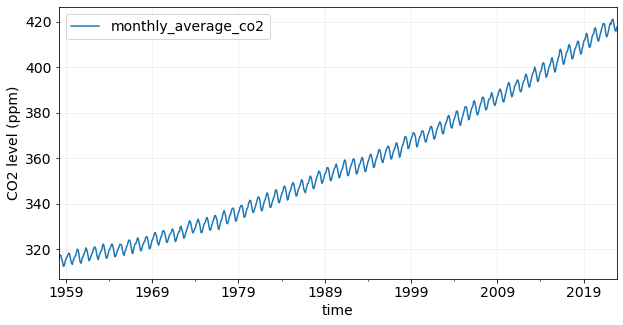

In [14]:
fig, ax = plt.subplots(1,1, figsize=(10, 5)) # we ask Python to make a blank plot
df_co2.plot(y='monthly_average_co2', ax=ax) # change the y value to whatever variable you want to plot)
ax.grid(True, alpha=0.2) # this gives us a grey grid in the background to better read the graph
ax.set_ylabel("CO2 level (ppm)") # Change the y label to whatever you want
ax.legend() # This creates a legend and adds an entry for whatever we've plotted

We can plot two variables on the same time series.

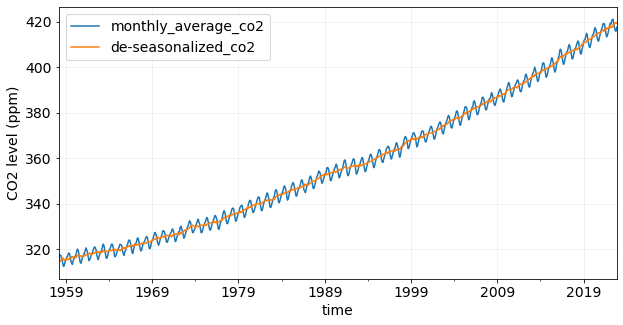

In [15]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))
df_co2.plot(y='monthly_average_co2', ax=ax) # our first line to plot
df_co2.plot(y='de-seasonalized_co2', ax=ax) # our second line to plot
# we can add as many lines to plot as we want
ax.grid(True, alpha=0.2)
ax.set_ylabel("CO2 level (ppm)")
ax.legend()

## Create a linear trend from table data

The function “linear fit”  fits the data in a plot to get a straight line; i.e. it calculates the slope of the plot to get the trend. The way this works is to “do the math” to define that line and then predict the data points that would fall along that line.  


In [16]:
def linear_fit(time_series, data):
    # assume the time series has a regular sampling rate
    times = np.arange(len(time_series))
    G = np.c_[times, np.ones_like(times)]
    Pinv = np.linalg.pinv(G)
    m = Pinv.dot(data)
    predicted_data = G @ m
    slope = m[0,:]
    intercept = m[1,:]
    return predicted_data, slope, intercept

We can now run the function on our data.

In [17]:
predicted_data, slope, intercept = linear_fit(time_series, df_co2['monthly_average_co2'].values.reshape([-1,1]))

The following adds the predicted data as a new column (here called linear_trend_co2) to the data frame.


In [18]:
df_co2['linear_trend_co2'] = predicted_data

Now we could plot that column.

# Working with Gridded data

## Load a .nc file

.nc files can be loaded with a python package called XArray

In [19]:
co2_data = xr.load_dataset("./taking_the_pulse_atmosphere_data/co2.nc")
# generically xarray_data = xr.load_dataset("./path_to/my_nc_file.nc")

## View information about a .nc file

We can view meta data about a .nc file by just writing the name of xarray dataset we loaded earlier.

In [20]:
co2_data

<xarray.Dataset>
Dimensions:  (time: 84, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-31 2015-02-28 ... 2021-12-31
  * lon      (lon) float64 -179.8 -178.8 -177.8 -176.8 ... 177.2 178.2 179.2
  * lat      (lat) float64 89.75 88.75 87.75 86.75 ... -87.25 -88.25 -89.25
Data variables:
    co2      (time, lat, lon) float64 400.6 400.6 400.6 ... 411.5 411.5 411.5
Attributes:
    Description:    CO2 data
    Unit:           ppmv (part per million per volume)
    Data document:  https://disc.gsfc.nasa.gov/datasets/OCO2_GEOS_L3CO2_MONTH...

Here, we see 262 samples (called entries), and 11 columns of information. If you are familiar with matrices, we can think of this dataset as a 262 x 11 matrix, or a table with 262 rows and 11 columns.

X array shows us that for every data point, there are three coordinates (time, latitude, and longitude). We can think of this data as a 3D array. For every time sample we will have a 2D spatial map of our data. We can use the count function to view the total number of data point.

In [21]:
co2_data.count()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    co2      int64 5443200

## Plot a gridded map

We can plot data from a .NC by using some of xarray's built in plotting functions. The code below can take in a desired date ("2017-04-05") and find the nearest time point in the data, plotting the 2D data.

/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:239: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:239: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarnin

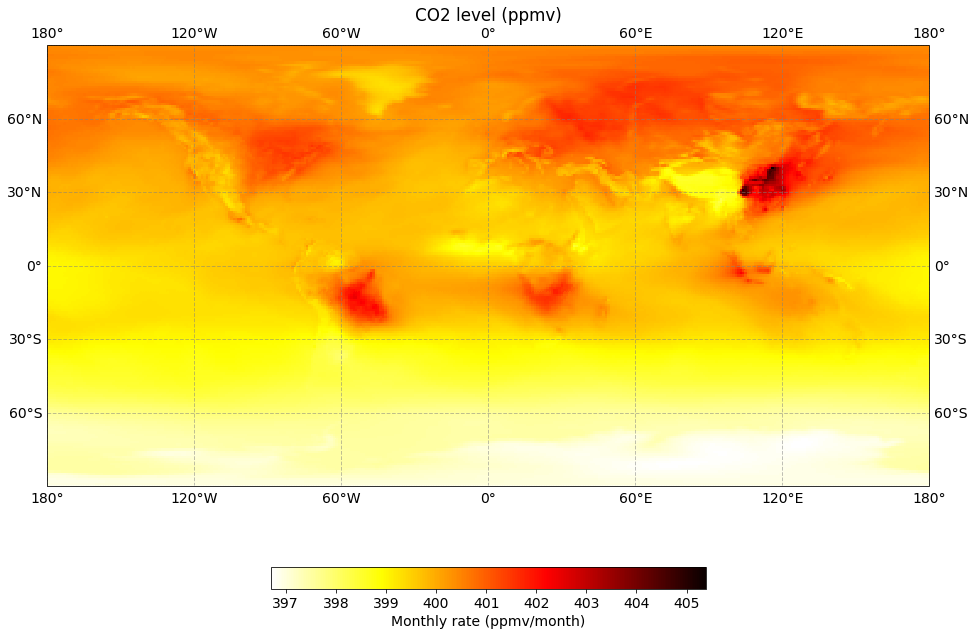

In [22]:
fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
## replace the following with the variable (here co2) you want to plot 
out = co2_data.co2.sel(time='2015-12-1', method='nearest').plot(ax=ax, add_colorbar=False, cmap='hot_r')
cb = plt.colorbar(out, fraction=0.04, orientation='horizontal')
## replace the following with the label you want on your color bar
cb.set_label("Monthly rate (ppmv/month)")
ax.set_aspect(1)
gl = ax.gridlines(
    crs=ccrs.PlateCarree(), 
    draw_labels=True,
    linewidth=1, 
    color='gray', 
    alpha=0.5, 
    linestyle='--')
## replace the following with the name you want on your plot
ax.set_title("CO2 level (ppmv)")
plt.show()


We can embellish this plot by adding coastlines, state boundaries, and rivers.

/usr/local/lib/python3.8/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


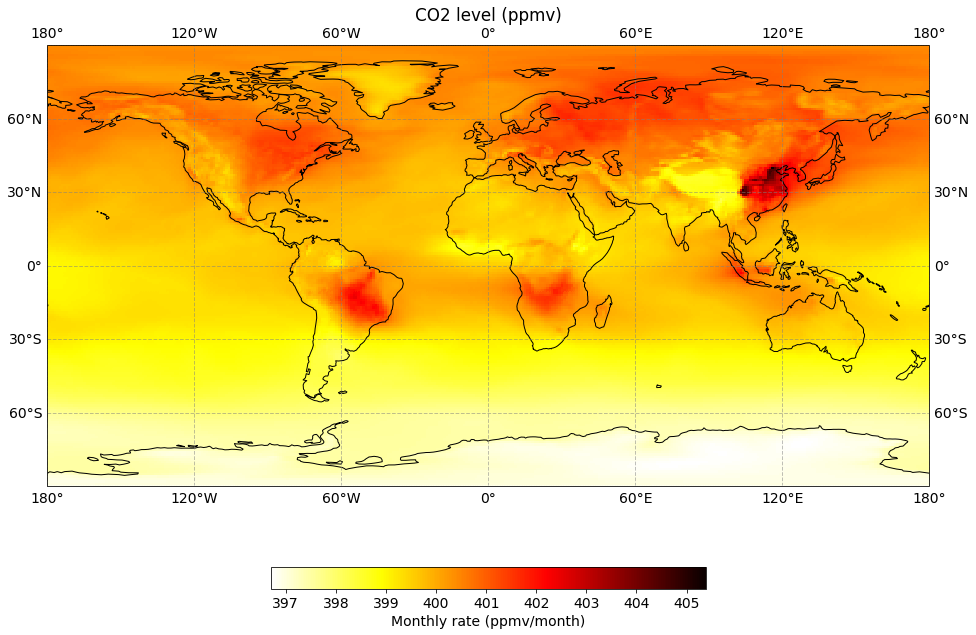

In [23]:
fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
## replace the following with the variable (here co2) you want to plot 
out = co2_data.co2.sel(time='2015-12-1', method='nearest').plot(ax=ax, add_colorbar=False, cmap='hot_r')
## adds coastlines
ax.axes.add_feature(cf.COASTLINE)
cb = plt.colorbar(out, fraction=0.04, orientation='horizontal')
## replace the following with the label you want on your color bar
cb.set_label("Monthly rate (ppmv/month)")
ax.set_aspect(1)
gl = ax.gridlines(
    crs=ccrs.PlateCarree(), 
    draw_labels=True,
    linewidth=1, 
    color='gray', 
    alpha=0.5, 
    linestyle='--')
## replace the following with the name you want on your plot
ax.set_title("CO2 level (ppmv)")
plt.show()

## Histogram of gridded data

We can analyze the points in our data using a histogram. This allows us to understand the distribution of the data. For example, a histogram can help us understand how the rest of the data relate to the minimum, maximum, and average of the data. The main variable here to tweak is the "bins" option, which will affect how coarse the histogram is. Try tweaking the bins option below so you can see for yourself.

Text(0, 0.5, 'counts')

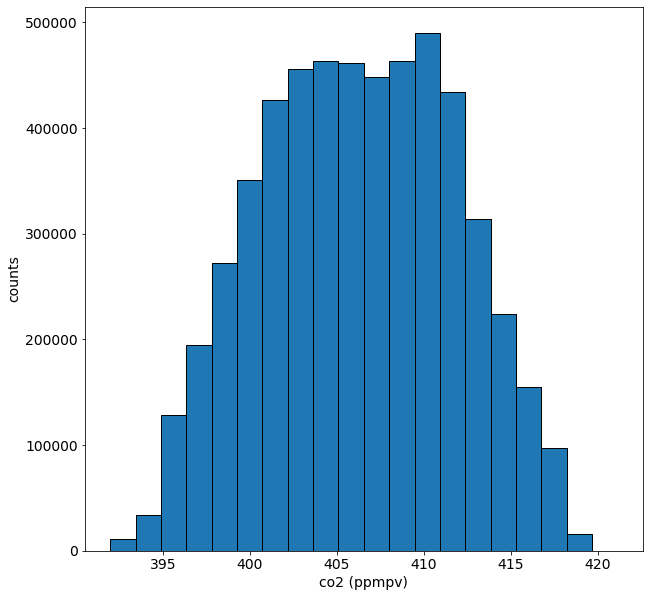

In [24]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
out = co2_data.co2.plot.hist(ax=ax, bins=20, edgecolor='k') # put the data into 20 bins
ax.set_xlabel("co2 (ppmpv)")
ax.set_ylabel("counts")

Here, the x axis is telling us the value of our variable. The y axis is telling us how many times in our dataset a particular range of values is encountered. Here we see that we rarely encounter especially low or especially high values of co2. Instead we often have values closer to the average for our dataset.

## Create a linear trend map with data from a .nc file

Trend maps can tell us how different spatial regions in our data have changed over time. If you've ever created a trend line in Microsoft Excel, this is a similar process.

In [25]:
vec = co2_data.co2.data.reshape((co2_data.co2.data.shape[0], np.prod(co2_data.co2.data.shape[1:])))
time_series = co2_data.time.data
# we break down the data into 1D data, like our CSV data, so that linear_fit can work on it
co2_linear_fit, slope, intercept = linear_fit(time_series, vec)
# now we put the data back the way it was and add it to our xarray dataset
co2_data['slope'] = (("y", "x"), slope.reshape(co2_data.co2.data.shape[1:]))
co2_data['intercept'] = (("y", "x"), intercept.reshape(co2_data.co2.data.shape[1:]))
co2_data['data_linear_fit'] = (("time", "y", "x"), co2_linear_fit.reshape(co2_data.co2.data.shape))

We can plot this linear trend with the code below. The "vmin" and "vmax" settings allow us to change the scale on our colorbar. If we decrease the range, our map will saturate. If we increase the range, our will wash out. The "cmap" option allows us to change our colorbar. If we want to reverse the colorbar, we can add or remove the "_r" tag. So "RdBu_r" -> "RdBu" or vice versa. Or "hot" -> "hot_r"

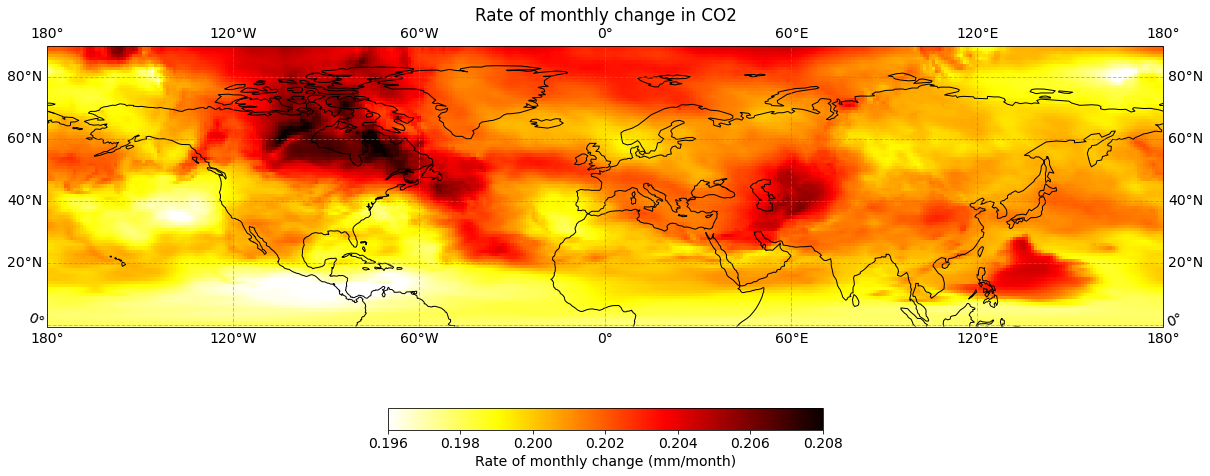

In [26]:
fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.axes.add_feature(cf.COASTLINE)

# vmin = the lowest point in our colorbar # vmax = the highest point in our colorbar
# cmap = the colorbar type you want to use
out = co2_data['slope'].plot(ax=ax, add_colorbar=False, vmin = 0.196, vmax = 0.208, cmap='hot_r')
cb = plt.colorbar(out, fraction=0.04, orientation='horizontal')
cb.set_label("Rate of monthly change (mm/month)")
ax.set_aspect(1)
ax.set_title("Rate of monthly change in CO2")

gl = ax.gridlines(
    crs=ccrs.PlateCarree(), 
    draw_labels=True,
    linewidth=1, 
    color='gray', 
    alpha=0.5, 
    linestyle='--'
)

## Locate country borders using geopandas

Let's use `geopandas` and read in a `geojson` file. 

In [27]:

gdf_boundaries = gpd.read_file("./taking_the_pulse_atmosphere_data/world-administrative-boundaries.geojson")
country_names = np.sort(gdf_boundaries.name.values)
gdf_boundaries = gdf_boundaries.set_index('name')

Using an object called a widget, we can explore this dataset's list of country names and pull out some names.

In [28]:
widget_country = widgets.Select(options=country_names)
widget_country

Select(options=('Abyei', 'Afghanistan', 'Aksai Chin', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Ango…

In [29]:
widget_country.value

'Abyei'

In [30]:
names = [
    'China', 
    'United States of America', 
    'India', 
    'Russian Federation', 
    'Japan', 
    'Iran (Islamic Republic of)', 
    'Germany',
    'Republic of Korea',
    'Saudi Arabia',
    'Indonesia'
]

We can then locate those country boundaries and plot them up.

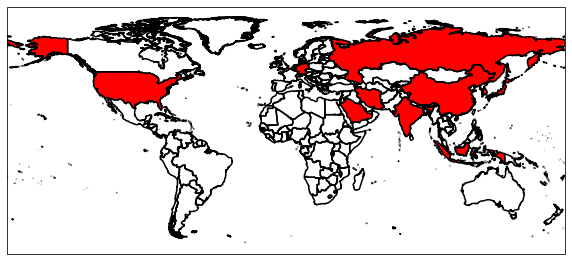

In [31]:
gdf_boundaries_top_10_co2 = gdf_boundaries.loc[names]
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
gdf_boundaries_top_10_co2.plot(ax=ax, color='r')
gdf_boundaries.boundary.plot(color='k', ax=ax)

## Extract data from country boundries; plot country borders

Now that we have some country boundries, we can extract data within those boundries. In an earlier example, we added to the co2 dataset by adding trend information. Due to how xarray works, it is easiest to load a copy of this dataset if we want to do a data extraction. I would also recommend doing the data extraction first and then any analysis (histograms, etc.) second.

In [32]:
co2_data_copy = xr.load_dataset('./taking_the_pulse_atmosphere_data/co2.nc')
co2_data_copy.rio.write_crs(4326, inplace=True)

<xarray.Dataset>
Dimensions:      (time: 84, lat: 180, lon: 360)
Coordinates:
  * time         (time) datetime64[ns] 2015-01-31 2015-02-28 ... 2021-12-31
  * lon          (lon) float64 -179.8 -178.8 -177.8 -176.8 ... 177.2 178.2 179.2
  * lat          (lat) float64 89.75 88.75 87.75 86.75 ... -87.25 -88.25 -89.25
    spatial_ref  int64 0
Data variables:
    co2          (time, lat, lon) float64 400.6 400.6 400.6 ... 411.5 411.5
Attributes:
    Description:    CO2 data
    Unit:           ppmv (part per million per volume)
    Data document:  https://disc.gsfc.nasa.gov/datasets/OCO2_GEOS_L3CO2_MONTH...

Here we supply the name or names of the countries we want to extract data from, and then we create a new dataset with those countries' data "clipped."

In [33]:
country_boundary = gdf_boundaries.loc[['China']]
co2_data_copy.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
co2_data_clipped = co2_data_copy.rio.clip(country_boundary.geometry.apply(mapping), country_boundary.crs, drop=False)

We can then plot or maniuplate only the clipped data. 

Text(0.5, 1.0, 'Co2 emissions from China')

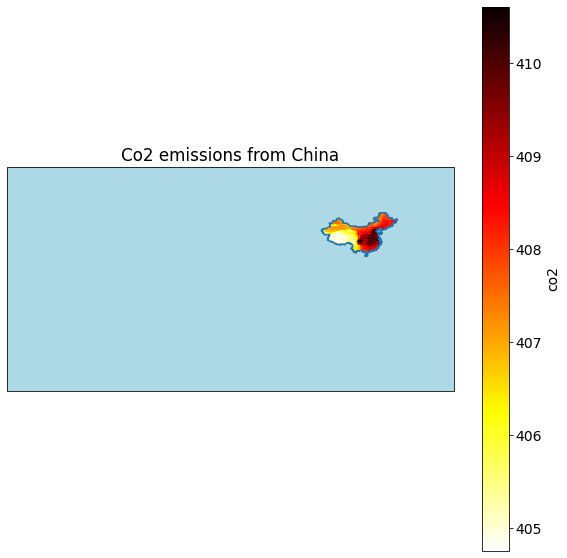

In [34]:
i_time = "2017-04-05"
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
out = co2_data_clipped.co2.sel(time=i_time, method='nearest').plot(ax=ax, cmap='hot_r')
country_boundary.boundary.plot(ax=ax)
ax.set_aspect(1)
ax.set_facecolor('lightblue')
ax.set_title("Co2 emissions from China")